In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


Unknown instance spec: Please select VM configuration

In [2]:
train_df = pd.read_csv('parsed_final_data_season_3.csv.zip', compression='zip')
test_df = pd.read_csv('final_test_data_season_3.csv.zip', compression='zip')

/tmp/ipykernel_8631/3222708738.py:1: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('parsed_final_data_season_3.csv.zip', compression='zip')


In [3]:
train_df.head()

,Unnamed: 0,bid_id,region_id,city_id,ad_slot_visibility,ad_slot_format,creative_id,advertiser_id,part_of_day,weekday,weekend,os,browser,ad_slot_screen_share,is_mobile_device,is_male,is_long_term_interest,is_in_market,is_info_cat,is_products_cat,is_service_cat,is_entertainment_cat,is_girly_cat,click
0,0,9aa9b28f32adfc833634f28bb9703e83,216,219,Na,Fixed,7321,2259,2,3,2,windows,chrome,0.06,False,NaN,NaN,NaN,False,False,False,False,False,False
1,1,1ede4e457f5031ec1640dbe1259a4616,216,217,FirstView,Fixed,7321,2259,2,3,2,windows,ie,0.06,False,NaN,NaN,NaN,False,False,False,False,False,False
2,2,fca79371fc0f67ac6264f558bc664fd6,216,217,Na,Fixed,7323,2259,2,3,2,windows,chrome,0.07,False,NaN,NaN,NaN,False,False,False,False,False,False
3,3,7717c608f688ea3b087e292c91604ea5,183,184,Na,Fixed,10722,2821,2,3,2,windows,ie,0.07,False,NaN,NaN,NaN,False,False,False,False,False,False
4,4,35528d946791bc45b75ded2a2dbdabfe,3,3,FirstView,Fixed,10722,2821,2,3,2,windows,ie,0.07,False,NaN,NaN,NaN,False,False,False,False,False,False


In [4]:
train_df.columns

Index(['Unnamed: 0', 'bid_id', 'region_id', 'city_id', 'ad_slot_visibility',
       'ad_slot_format', 'creative_id', 'advertiser_id', 'part_of_day',
       'weekday', 'weekend', 'os', 'browser', 'ad_slot_screen_share',
       'is_mobile_device', 'is_male', 'is_long_term_interest', 'is_in_market',
       'is_info_cat', 'is_products_cat', 'is_service_cat',
       'is_entertainment_cat', 'is_girly_cat', 'click'],
      dtype='object')

In [5]:
pd.unique(train_df['click'])

array([False,  True])

In [6]:
pd.unique(train_df['is_male'])

array([nan, False, True], dtype=object)

In [7]:
test_df.columns

Index(['Unnamed: 0', 'bid_id', 'region_id', 'city_id', 'ad_slot_visibility',
       'ad_slot_format', 'creative_id', 'advertiser_id', 'click',
       'part_of_day', 'weekday', 'weekend', 'os', 'browser',
       'ad_slot_screen_share', 'is_mobile_device', 'is_male',
       'is_long_term_interest', 'is_in_market', 'is_info_cat',
       'is_products_cat', 'is_service_cat', 'is_entertainment_cat',
       'is_girly_cat'],
      dtype='object')

In [8]:
pd.unique(test_df['click'])

array([False,  True])

In [9]:
train_df = train_df.drop('Unnamed: 0', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)

In [19]:
target_column = 'click'
feature_columns = train_df.columns.difference([target_column, 'bid_id'])
categorical_features = ['region_id', 'city_id', 'ad_slot_visibility',
       'ad_slot_format', 'creative_id', 'advertiser_id', 'part_of_day',
       'weekday', 'weekend', 'os', 'browser',
       'is_mobile_device', 'is_male', 'is_long_term_interest', 'is_in_market',
       'is_info_cat', 'is_products_cat', 'is_service_cat',
       'is_entertainment_cat', 'is_girly_cat']

In [11]:
train_df.isna().sum()

bid_id                         0
region_id                      0
city_id                        0
ad_slot_visibility             0
ad_slot_format                 0
creative_id                    0
advertiser_id                  0
part_of_day                    0
weekday                        0
weekend                        0
os                             0
browser                        0
ad_slot_screen_share           0
is_mobile_device               0
is_male                  8325108
is_long_term_interest    8325108
is_in_market             8325108
is_info_cat                    0
is_products_cat                0
is_service_cat                 0
is_entertainment_cat           0
is_girly_cat                   0
click                          0
dtype: int64

In [12]:
len(train_df)

21341595

In [13]:
train_df = train_df.fillna(value=False)

In [14]:
train_df.isna().sum()

bid_id                   0
region_id                0
city_id                  0
ad_slot_visibility       0
ad_slot_format           0
creative_id              0
advertiser_id            0
part_of_day              0
weekday                  0
weekend                  0
os                       0
browser                  0
ad_slot_screen_share     0
is_mobile_device         0
is_male                  0
is_long_term_interest    0
is_in_market             0
is_info_cat              0
is_products_cat          0
is_service_cat           0
is_entertainment_cat     0
is_girly_cat             0
click                    0
dtype: int64

In [15]:
test_df.isna().sum()

bid_id                   0
region_id                0
city_id                  0
ad_slot_visibility       0
ad_slot_format           0
creative_id              0
advertiser_id            0
click                    0
part_of_day              0
weekday                  0
weekend                  0
os                       0
browser                  0
ad_slot_screen_share     0
is_mobile_device         0
is_male                  0
is_long_term_interest    0
is_in_market             0
is_info_cat              0
is_products_cat          0
is_service_cat           0
is_entertainment_cat     0
is_girly_cat             0
dtype: int64

In [16]:
train_df.dtypes

bid_id                    object
region_id                  int64
city_id                    int64
ad_slot_visibility        object
ad_slot_format            object
creative_id                int64
advertiser_id              int64
part_of_day                int64
weekday                    int64
weekend                    int64
os                        object
browser                   object
ad_slot_screen_share     float64
is_mobile_device            bool
is_male                     bool
is_long_term_interest       bool
is_in_market                bool
is_info_cat                 bool
is_products_cat             bool
is_service_cat              bool
is_entertainment_cat        bool
is_girly_cat                bool
click                       bool
dtype: object

In [17]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df[target_column])


In [20]:
train_pool = Pool(data=train_df[feature_columns],
                  label=train_df[target_column],
                  cat_features=categorical_features)

In [21]:
test_pool = Pool(data=test_df[feature_columns],
                 label=test_df[target_column],
                 cat_features=categorical_features)

In [23]:
val_pool = Pool(data=val_df[feature_columns],
                 label=val_df[target_column],
                 cat_features=categorical_features)

In [24]:
class_counts = train_df[target_column].value_counts()
class_counts

False    17063938
True         9338
Name: click, dtype: int64

In [25]:
class_0_count = class_counts.get(0, 1)
class_1_count = class_counts.get(1, 1)
class_0_count

17063938

In [26]:
total_count = class_0_count + class_1_count
class_weights = [total_count / class_0_count, total_count / class_1_count]

model = CatBoostClassifier(iterations=300, 
                           learning_rate=0.01, 
                           depth=4, 
                           task_type='GPU',
                           loss_function='Logloss',
                           class_weights=class_weights,
                           eval_metric='AUC',
                           verbose=100,
                           l2_leaf_reg=3)

In [27]:
model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=100, verbose=True)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8069348	best: 0.8069348 (0)	total: 1.98s	remaining: 9m 52s
1:	total: 3.4s	remaining: 8m 26s
2:	total: 4.82s	remaining: 7m 56s
3:	total: 6.23s	remaining: 7m 41s
4:	total: 7.64s	remaining: 7m 30s
5:	test: 0.8323829	best: 0.8329069 (4)	total: 9.06s	remaining: 7m 23s
6:	total: 10.4s	remaining: 7m 16s
7:	total: 11.8s	remaining: 7m 12s
8:	total: 13.1s	remaining: 7m 3s
9:	total: 14.5s	remaining: 6m 59s
10:	test: 0.8367909	best: 0.8367909 (10)	total: 15.9s	remaining: 6m 58s
11:	total: 17.3s	remaining: 6m 56s
12:	total: 18.9s	remaining: 6m 56s
13:	total: 20.3s	remaining: 6m 53s
14:	total: 21.7s	remaining: 6m 52s
15:	test: 0.8392694	best: 0.8392694 (15)	total: 23.2s	remaining: 6m 51s
16:	total: 24.6s	remaining: 6m 49s
17:	total: 26s	remaining: 6m 47s
18:	total: 27.4s	remaining: 6m 45s
19:	total: 28.8s	remaining: 6m 42s
20:	test: 0.8427497	best: 0.8430165 (17)	total: 30.2s	remaining: 6m 41s
21:	total: 31.4s	remaining: 6m 37s
22:	total: 32.8s	remaining: 6m 35s
23:	total: 34.1s	remaining

In [28]:
predictions = model.predict_proba(test_pool)[:, 1]

In [29]:
roc_auc = roc_auc_score(test_df[target_column], predictions)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.6297


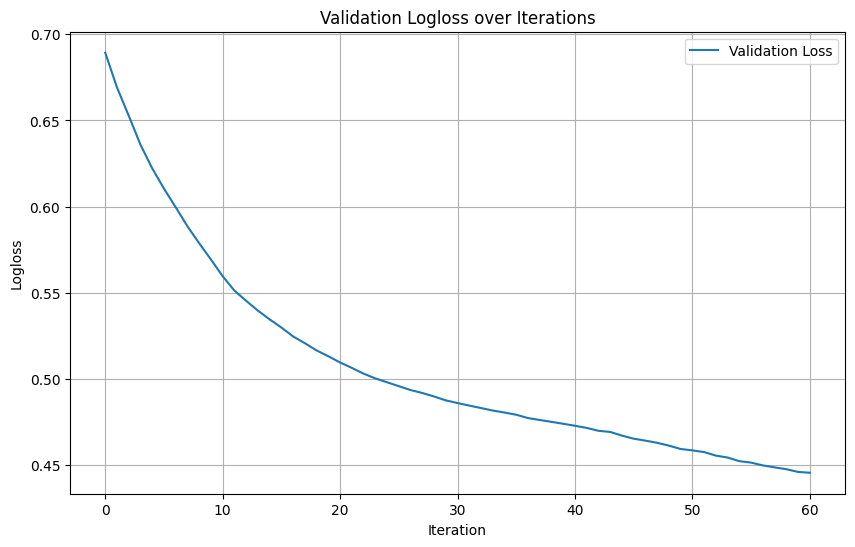

In [30]:
eval_results = model.get_evals_result()
validation_loss = eval_results['validation']['Logloss']

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(validation_loss)), validation_loss, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('Validation Logloss over Iterations')
plt.legend()
plt.grid()
plt.show()

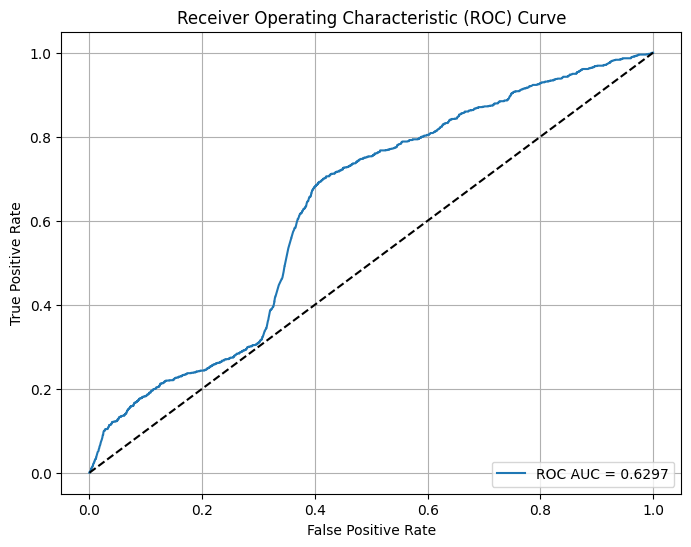

In [31]:
fpr, tpr, thresholds = roc_curve(test_df[target_column], predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

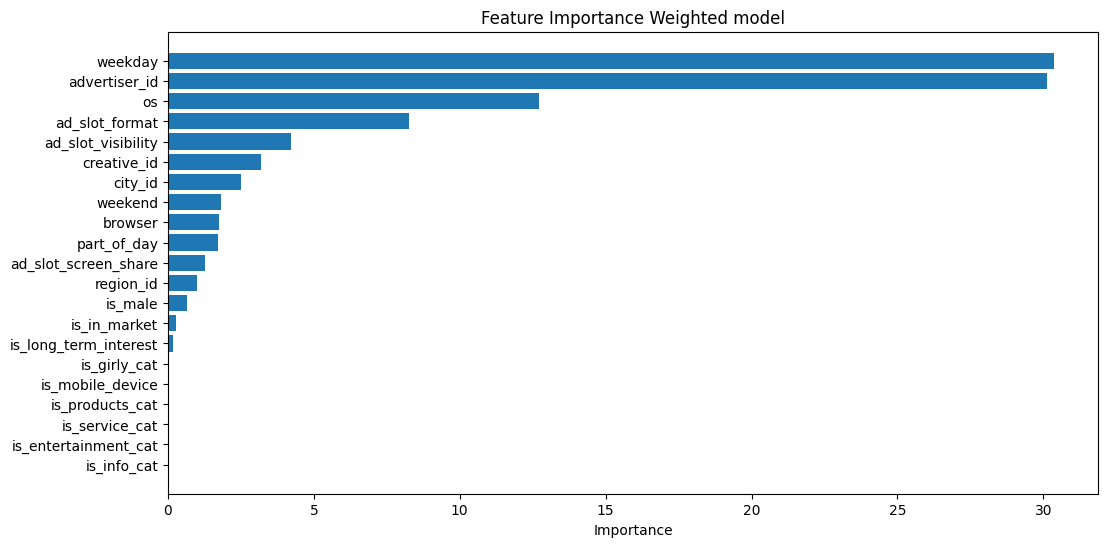

In [32]:
feature_importances = model.get_feature_importance(train_pool)
feature_importances_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Weighted model')
plt.gca().invert_yaxis()
plt.show()

In [33]:
model.save_model('catboost_model_weighted_all_features_season_3.cbm')

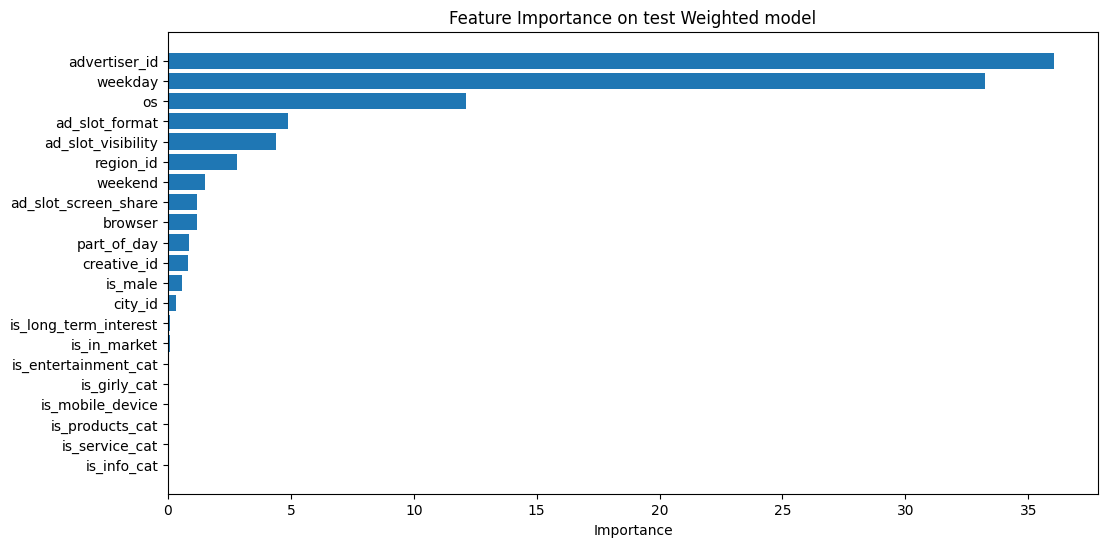

In [34]:
feature_importances = model.get_feature_importance(test_pool)
feature_importances_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance on test Weighted model')
plt.gca().invert_yaxis()
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    'depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05],
    'iterations': [300, 500],
    'l2_leaf_reg': [2, 3, 4]
}
cat_model = CatBoostClassifier(
    task_type='GPU',
    loss_function='Logloss',
    eval_metric='AUC',
    early_stopping_rounds=100,
    class_weights=class_weights,
    cat_features=categorical_features,
    verbose=50
)

In [39]:
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X=train_df[feature_columns], y=train_df[target_column])

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

IOStream.flush timed out
IOStream.flush timed out
Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 580ms	remaining: 2m 53s
50:	total: 28.9s	remaining: 2m 21s
100:	total: 57.6s	remaining: 1m 53s
150:	total: 1m 26s	remaining: 1m 25s
200:	total: 1m 56s	remaining: 57.2s
250:	total: 2m 26s	remaining: 28.5s
299:	total: 2m 54s	remaining: 0us


IOStream.flush timed out
IOStream.flush timed out
Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 502ms	remaining: 2m 30s
50:	total: 27.2s	remaining: 2m 13s
100:	total: 55s	remaining: 1m 48s
150:	total: 1m 25s	remaining: 1m 23s
200:	total: 1m 56s	remaining: 57.1s
250:	total: 2m 24s	remaining: 28.3s
299:	total: 2m 53s	remaining: 0us


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 501ms	remaining: 2m 29s
50:	total: 27.4s	remaining: 2m 13s
100:	total: 55s	remaining: 1m 48s
150:	total: 1m 23s	remaining: 1m 22s
200:	total: 1m 54s	remaining: 56.4s
250:	total: 2m 23s	remaining: 28.1s
299:	total: 2m 51s	remaining: 0us


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 581ms	remaining: 2m 53s
50:	total: 29.8s	remaining: 2m 25s
100:	total: 58.8s	remaining: 1m 55s
150:	total: 1m 26s	remaining: 1m 25s
200:	total: 1m 55s	remaining: 57s
250:	total: 2m 24s	remaining: 28.2s
299:	total: 2m 51s	remaining: 0us


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


KeyboardInterrupt: 

In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict_proba(test_pool)[:, 1]

In [ ]:
test_roc_auc = roc_auc_score(test_df[target_column], predictions)
print(f"Test ROC AUC Score: {test_roc_auc}")